In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [54]:
class Kmeans:
    def __init__ (self,df, K,max_iters):
        self.df = df
        self.K = K
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        
    def create_centroids(self,k):
        centroids = []
        for i in range(k):
            centroid = self.df.apply(lambda x: float(x.sample()))
            centroids.append(centroid)
        return pd.concat(centroids, axis= 1)

    def get_labels(self, centroids):
        distances = centroids.apply(lambda x:np.sqrt(((self.df - x) ** 2).sum(axis=1)))
        return distances.idxmin(axis=1)

    def new_centroids(self, labels, k):
        return df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    
    def plot_clusters(self, labels, centriods, iteration):
        pca = PCA (n_components= 2)
        df_2d = pca.fit_transform(self.df)
        centriods_2d = pca.transform (centroids.T)
        clear_output (wait = True)
        plt.title (f'Iteration {iteration}')
        plt.scatter(x = df_2d[:,0], y =df_2d[:,1], c= labels)
        plt.scatter(x=centriods_2d[:, 0], y=centriods_2d [:,1])
        plt.show()
    def fit(self):
        self.centroids = self.create_centroids(self.K)
        for i in range(self.max_iters):
            self.labels = self.get_labels(self.centroids)
            self.plot_clusters(self.labels, self.centroids, i)
            new_centroids = self.new_centroids(self.labels, self.K)
            if np.allclose(self.centroids.values, new_centroids.values):
                break
            self.centroids = new_centroids

In [2]:
df = pd.read_csv('small_iris.csv')

In [3]:
df

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [6]:
df = ((df - df.min()) / (df.max() - df.min())) * 9 + 1

kmeans_model = Kmeans(K = 3, max_iters=100)

In [8]:
df.describe()

,sepal length (cm),petal length (cm)
count,150.000000,150.000000
mean,4.858333,5.207119
std,2.070165,2.692828
min,1.000000,1.000000
25%,3.000000,1.915254
50%,4.750000,6.110169
75%,6.250000,7.254237
max,10.000000,10.000000


In [9]:
df.head()

,sepal length (cm),petal length (cm)
0,3.00,1.610169
1,2.50,1.610169
2,2.00,1.457627
3,1.75,1.762712
4,2.75,1.610169


In [12]:
def create_centroids(df,k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis= 1)

In [13]:
centroids = create_centroids(df, 5)

In [14]:
centroids

,0,1,2,3,4
sepal length (cm),3.000000,5.500000,10.000000,2.250000,2.50000
petal length (cm),1.915254,1.762712,1.915254,9.237288,6.79661


In [24]:
def get_labels(df, centroids):
    distances = centroids.apply(lambda x:np.sqrt(((df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [25]:
labels = get_labels (df,centroids)

In [26]:
labels.value_counts()

4    87
0    48
3     9
1     3
2     3
dtype: int64

In [29]:
def new_centroids(df, labels, k):
    return df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [35]:
def plot_clusters(df, labels, centriods, iteration):
    pca = PCA (n_components= 2)
    df_2d = pca.fit_transform(df)
    centriods_2d = pca.transform (centroids.T)
    clear_output (wait = True)
    plt.title (f'Iteration {iteration}')
    plt.scatter(x = df_2d[:,0], y =df_2d[:,1], c= labels)
    plt.scatter(x=centriods_2d[:, 0], y=centriods_2d [:,1])
    plt.show()

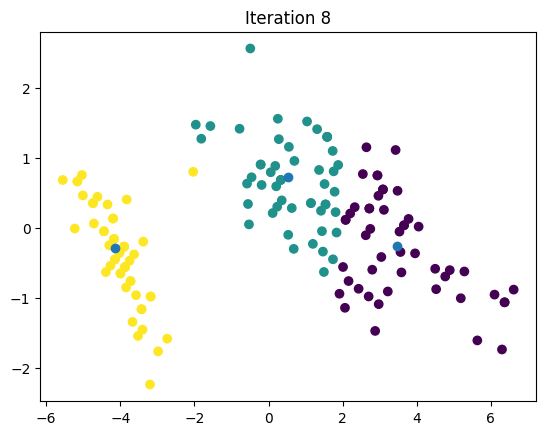

In [39]:
max_iter = 100
k = 3
centroids = create_centroids(df,k)
old_centroids = pd.DataFrame()
iteration = 1
while iteration < max_iter and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, k)
    plot_clusters (df, labels, centroids, iteration)
    iteration +=1

In [40]:
centroids

,0,1,2
sepal length (cm),7.123482,4.585065,2.620734
petal length (cm),7.835365,6.057060,1.713173
